# Import Required  Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Read

In [2]:
df = pd.read_csv("LoanData.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# There are two types of data
- Numerical 
- Categorical

In [8]:
#Filling out Null Values in Categorical data

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#Filling out Null Values in Numerical data

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outliers Detection & Handling

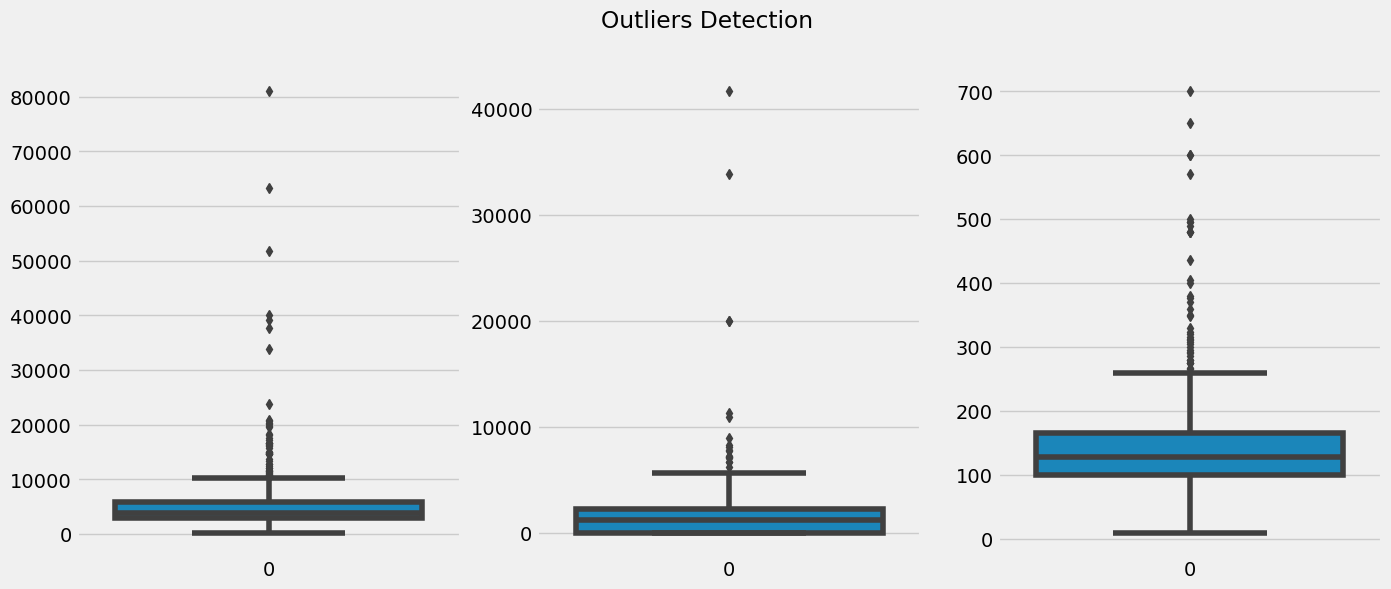

In [12]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1,3,1)
sns.boxplot(df['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Outliers Detection')
plt.show()

# Handling Outliers

In [13]:
print('Before Removing the outliers', df.shape)

df = df[df['ApplicantIncome']<25000]

print('After removing the outliers', df.shape)

Before Removing the outliers (614, 13)
After removing the outliers (607, 13)


In [14]:
print('Before Removing the outliers', df.shape)

df = df[df['CoapplicantIncome']<12000]

print('After removing the outliers', df.shape)

Before Removing the outliers (607, 13)
After removing the outliers (603, 13)


In [15]:
print('Before Removing the outliers', df.shape)

df = df[df['LoanAmount']<400]

print('After removing the outliers', df.shape)

Before Removing the outliers (603, 13)
After removing the outliers (591, 13)


# Analysing the data

C:\Users\manthan mankar\AppData\Local\Temp\ipykernel_5372\2091828603.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'],color = 'red')
C:\Users\manthan mankar\AppData\Local\Temp\ipykernel_5372\2091828603.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIn

<Axes: xlabel='LoanAmount', ylabel='Density'>

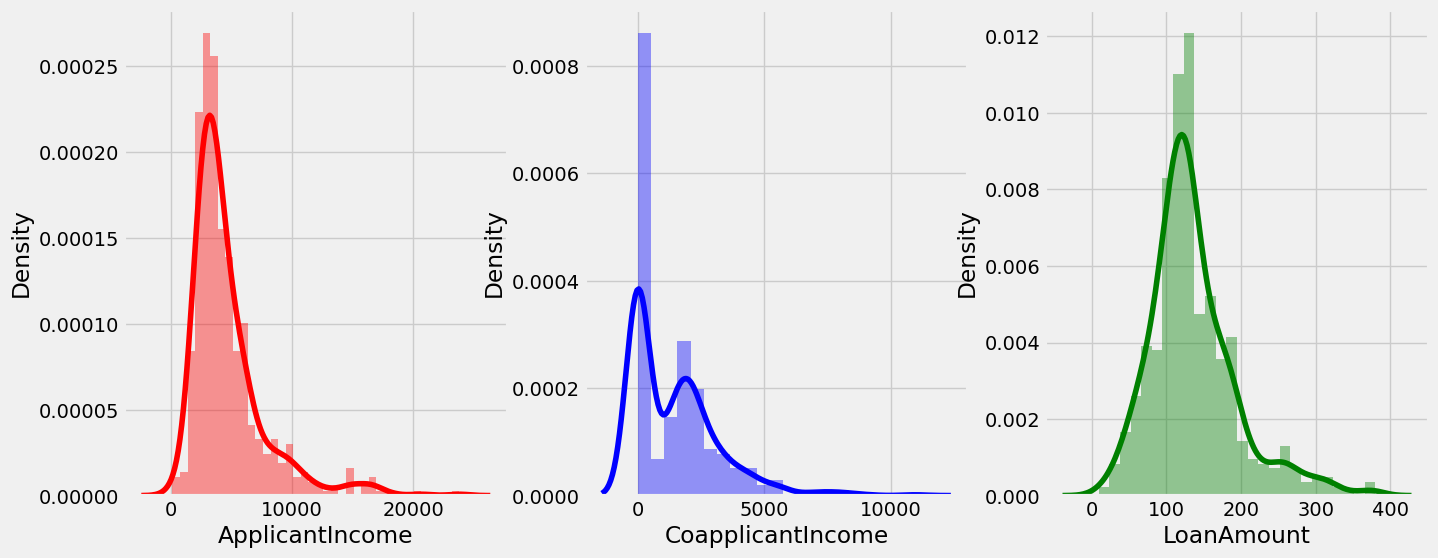

In [16]:
plt.subplot(1,3,1)
sns.distplot(df['ApplicantIncome'],color = 'red')

plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'],color = 'blue')

plt.subplot(1,3,3)
sns.distplot(df['LoanAmount'],color = 'green')

C:\Users\manthan mankar\AppData\Local\Temp\ipykernel_5372\1422523259.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'],color = 'red')
C:\Users\manthan mankar\AppData\Local\Temp\ipykernel_5372\1422523259.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantI

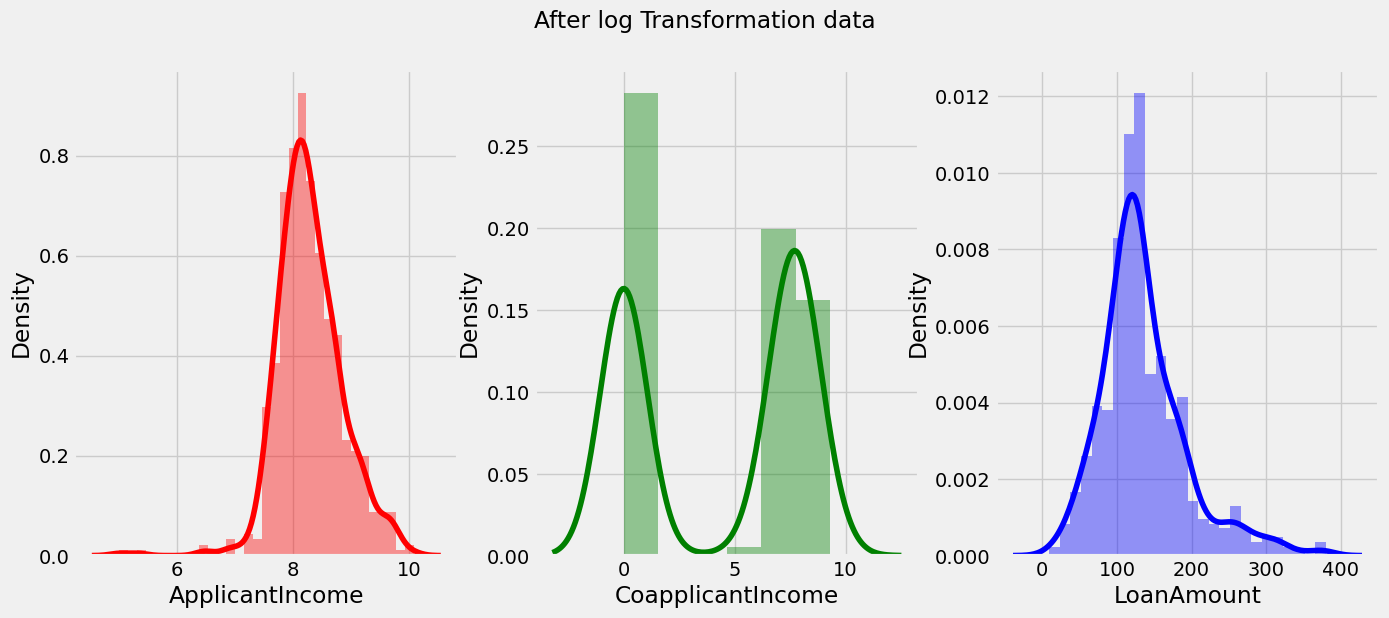

In [17]:
# Log Transform 

df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

plt.subplot(1,3,1)
sns.distplot(df['ApplicantIncome'],color = 'red')

plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'],color = 'green')

plt.subplot(1,3,3)
sns.distplot(df['LoanAmount'],color = 'blue')

plt.suptitle('After log Transformation data')
plt.show()

In [18]:
#Seprating Numerical & Categorical data

num = df.select_dtypes('number').columns.tolist()
cat = df.select_dtypes('object').columns.tolist()

In [19]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [20]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

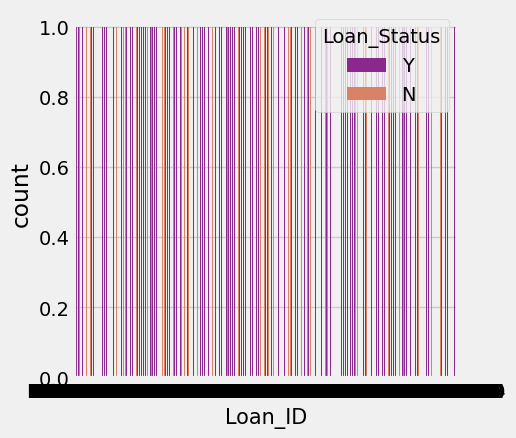

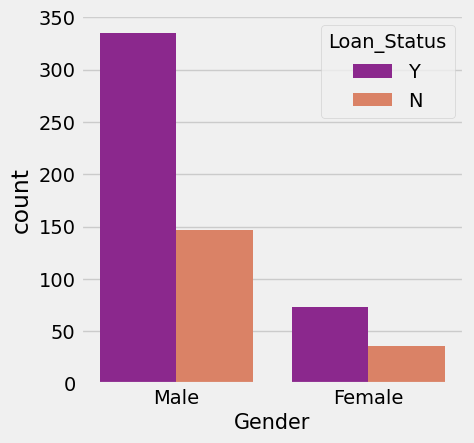

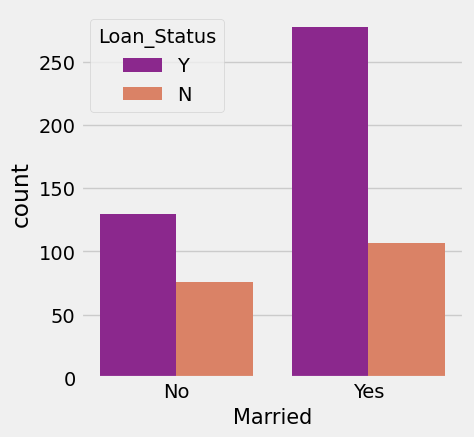

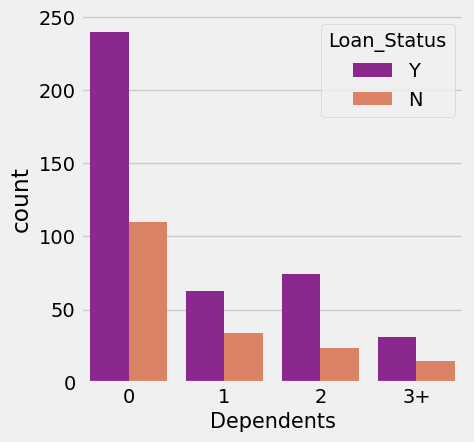

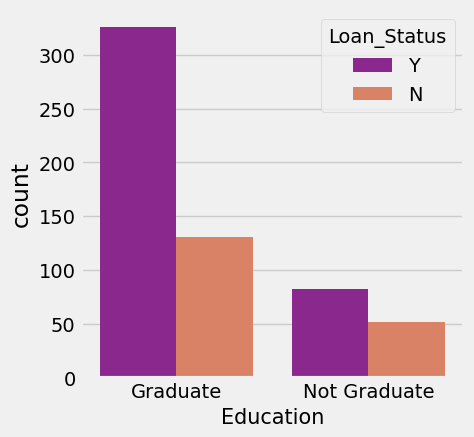

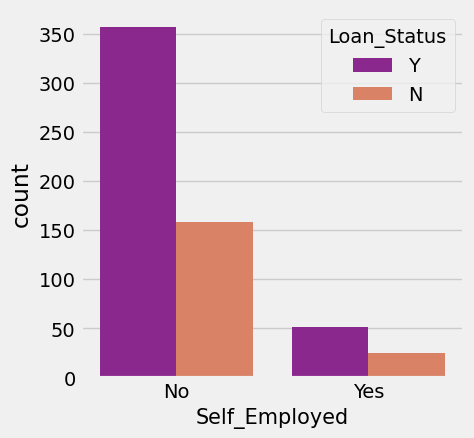

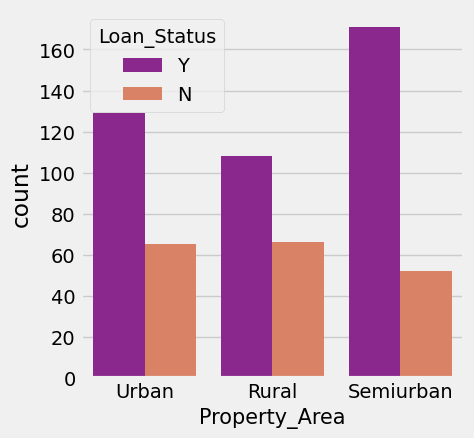

In [21]:
#To check Categorical data for imbalancement 

for i in cat[:-1]:
    plt.figure(figsize = (15,10))
    plt.subplot(2,3,1)
    sns.countplot(x =i, hue = 'Loan_Status', data= df, palette = 'plasma' )
    plt.xlabel(i, fontsize = 15)

In [22]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
# Plot categorical with target data

print(pd.crosstab(df['Loan_Status'],df['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [24]:
print(pd.crosstab(df['Loan_Status'],df['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [25]:
print(pd.crosstab(df['Loan_Status'],df['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [26]:
print(pd.crosstab(df['Loan_Status'],df['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


# Data Prepration

In [27]:
df.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [28]:
df = df.drop(['Loan_ID'], axis = 1)

In [29]:
df.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


# Data Encoding 

In [30]:
df['Gender'] = df['Gender'].replace(('Male', 'Female'),(1,0))
df['Married'] = df['Married'].replace(('Yes', 'No'),(1,0))
df['Education'] = df['Education'].replace(('Graduate', 'Not Graduate'),(1,0))

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,1,1,1,1,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,1,1,0,1,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,1,1,0,0,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,1,0,0,1,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [32]:
df['Dependents'].value_counts()

0     350
2      98
1      97
3+     46
Name: Dependents, dtype: int64

In [33]:
df['Self_Employed'] = df['Self_Employed'].replace(('Yes', 'No'),(1,0))
df['Loan_Status'] = df['Loan_Status'].replace(('Y', 'N'),(1,0))
df['Property_Area'] = df['Property_Area'].replace(('Urban', 'Semiurban','Rural'),(1,1,0))

df['Dependents'] = df['Dependents'].replace(('0', '1','2', '3+'),(0,1,1,1))


In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [35]:
x = df.drop(['Loan_Status'],axis = 1)
y = df['Loan_Status']

In [36]:
x.shape, y.shape

((591, 11), (591,))

# To handle Unbalanced Data using over_sampling function - SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
OL = SMOTE()

In [39]:
x_resample, y_resample = OL.fit_resample(x,y.values.ravel())

In [40]:
x_resample.shape, y_resample.shape

((816, 11), (816,))

# Training & Testing split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.2,random_state=0)

In [43]:
x_train.shape

(652, 11)

In [44]:
x_test.shape

(164, 11)

In [45]:
y_train.shape

(652,)

In [46]:
y_test.shape

(164,)

# Model Selection

1. LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
ypred_lr = LR.predict(x_test)

In [50]:
print('Training Score', LR.score(x_train,y_train))
print('Testing Score', LR.score(x_test,y_test))


Training Score 0.799079754601227
Testing Score 0.7621951219512195


In [51]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print('Classification report\n',classification_report(y_test,ypred_lr))
print()
print('Accuracy Score\n',accuracy_score(y_test,ypred_lr))

Classification report
               precision    recall  f1-score   support

           0       0.80      0.70      0.75        82
           1       0.73      0.83      0.78        82

    accuracy                           0.76       164
   macro avg       0.77      0.76      0.76       164
weighted avg       0.77      0.76      0.76       164


Accuracy Score
 0.7621951219512195


# 2. Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(x_train,y_train)

ypred_DT = DT.predict(x_test)

In [53]:
print('Classification report\n', classification_report(y_test,ypred_DT))
print()
print('Confusion Matrix \n', confusion_matrix(y_test,ypred_DT))
print()
print('Accuracy score \n', accuracy_score(y_test,ypred_DT))

Classification report
               precision    recall  f1-score   support

           0       0.68      0.84      0.75        82
           1       0.79      0.61      0.69        82

    accuracy                           0.73       164
   macro avg       0.74      0.73      0.72       164
weighted avg       0.74      0.73      0.72       164


Confusion Matrix 
 [[69 13]
 [32 50]]

Accuracy score 
 0.725609756097561


# 3. SVM - Support Vector Machine

In [54]:
from sklearn.svm import SVC

svc = SVC()

In [55]:
svc.fit(x_train,y_train)

ypred_svc = svc.predict(x_test)

In [56]:
print('Classification report\n', classification_report(y_test,ypred_svc))
print()
print('Confusion Matrix \n', confusion_matrix(y_test,ypred_svc))
print()
print('Accuracy score \n', accuracy_score(y_test,ypred_svc))

Classification report
               precision    recall  f1-score   support

           0       0.55      0.15      0.23        82
           1       0.51      0.88      0.64        82

    accuracy                           0.51       164
   macro avg       0.53      0.51      0.44       164
weighted avg       0.53      0.51      0.44       164


Confusion Matrix 
 [[12 70]
 [10 72]]

Accuracy score 
 0.5121951219512195


# 4. Navie Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

GB = GaussianNB()

In [58]:
GB.fit(x_train,y_train)

ypred_GB = GB.predict(x_test)

In [59]:
print('Classification report\n', classification_report(y_test,ypred_GB))
print()
print('Confusion Matrix \n', confusion_matrix(y_test,ypred_GB))
print()
print('Accuracy score \n', accuracy_score(y_test,ypred_GB))

Classification report
               precision    recall  f1-score   support

           0       0.85      0.62      0.72        82
           1       0.70      0.89      0.78        82

    accuracy                           0.76       164
   macro avg       0.78      0.76      0.75       164
weighted avg       0.78      0.76      0.75       164


Confusion Matrix 
 [[51 31]
 [ 9 73]]

Accuracy score 
 0.7560975609756098


# 5. KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [61]:
knn.fit(x_train,y_train)

ypred_KNN = knn.predict(x_test)

In [62]:
print('Classification report\n', classification_report(y_test,ypred_KNN))
print()
print('Confusion Matrix \n', confusion_matrix(y_test,ypred_KNN))
print()
print('Accuracy score \n', accuracy_score(y_test,ypred_KNN))

Classification report
               precision    recall  f1-score   support

           0       0.62      0.73      0.67        82
           1       0.68      0.56      0.61        82

    accuracy                           0.65       164
   macro avg       0.65      0.65      0.64       164
weighted avg       0.65      0.65      0.64       164


Confusion Matrix 
 [[60 22]
 [36 46]]

Accuracy score 
 0.6463414634146342


# 6. XGBoost

In [63]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [64]:
XGB = XGBClassifier(objective='binary:logistic')

In [65]:
params = {
    'eta': np.arange(0.1, 0.26, 0.05),
    'min_child_weight': np.arange(1, 5, 0.5).tolist(),
    'gamma': [5],
    'subsample': np.arange(0.5, 1.0, 0.11).tolist(),
    'colsample_bytree': np.arange(0.5, 1.0, 0.11).tolist()
}

In [66]:
# Make a scorer from a performance metric or loss function
scorers = {
    'f1_score': make_scorer(f1_score),
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [67]:
skf = KFold(n_splits = 10, shuffle = True, random_state=2)

In [68]:
# Set up the grid search CV
grid = GridSearchCV(
    estimator = XGB,
    param_grid = params,
    scoring = scorers,
    n_jobs = -1,
    cv = skf,
    refit = 'accuracy_score'
)

In [69]:
grid.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
print("Best Parameters:", grid.best_params_)

# Print the best score found
print("Best Cross-Validation Score:", grid.best_score_)

In [ ]:
ypred_xgb =grid.predict(x_test)

In [ ]:
print('Classification report\n', classification_report(y_test,ypred_xgb))
print()
print('Confusion Matrix \n', confusion_matrix(y_test,ypred_xgb))
print()
print('Accuracy score \n', accuracy_score(y_test,ypred_xgb))

In [70]:
XGB.fit(x_train,y_train)

ypred_XGB = XGB.predict(x_test)

In [71]:
print('Classification report\n', classification_report(y_test,ypred_XGB))
print()
print('Confusion Matrix \n', confusion_matrix(y_test,ypred_XGB))
print()
print('Accuracy score \n', accuracy_score(y_test,ypred_XGB))

Classification report
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        82
           1       0.82      0.78      0.80        82

    accuracy                           0.80       164
   macro avg       0.81      0.80      0.80       164
weighted avg       0.81      0.80      0.80       164


Confusion Matrix 
 [[68 14]
 [18 64]]

Accuracy score 
 0.8048780487804879


# All Models Accuracy

In [73]:
print('Accuracy Score for Logistic Regression: \t',accuracy_score(y_test,ypred_lr))
print('Accuracy Score for Decission Tree: \t',accuracy_score(y_test,ypred_DT))
print('Accuracy Score for Navie Bayes: \t',accuracy_score(y_test,ypred_GB))
print('Accuracy Score for KNN: \t',accuracy_score(y_test,ypred_KNN))
print('Accuracy Score for SVM: \t',accuracy_score(y_test,ypred_svc))
print('Accuracy score for XGBoost: \t', accuracy_score(y_test,ypred_XGB))

Accuracy Score for Logistic Regression: 	 0.7621951219512195
Accuracy Score for Decission Tree: 	 0.725609756097561
Accuracy Score for Navie Bayes: 	 0.7560975609756098
Accuracy Score for KNN: 	 0.6463414634146342
Accuracy Score for SVM: 	 0.5121951219512195
Accuracy score for XGBoost: 	 0.8048780487804879


# Improving Logistic Regression model Accuracy

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [75]:
# Create a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Define the hyperparameter grid to search
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best score found
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Accuracy:", test_score)

Best Parameters: {'logisticregression__C': 1, 'logisticregression__solver': 'lbfgs'}
Best Cross-Validation Score: 0.7652143276570758
Test Set Accuracy: 0.7865853658536586


Best Model according to GridSearchCV

In [76]:
best_model_LR = LogisticRegression(C=10, solver='liblinear', max_iter=1000 )

best_model_LR.fit(x_train,y_train)

ypred_Best_Model = best_model_LR.predict(x_test)

print('Trainig Accuracy Score: \t', best_model_LR.score(x_train,y_train))
print('Testing Accuracy Score: \t', best_model_LR.score(x_test,y_test))

print('Classification report\n', classification_report(y_test,ypred_Best_Model))
print()
print('Confusion Matrix \n', confusion_matrix(y_test,ypred_Best_Model))
print()
print('Accuracy score \n', accuracy_score(y_test,ypred_Best_Model))

Trainig Accuracy Score: 	 0.7898773006134969
Testing Accuracy Score: 	 0.7926829268292683
Classification report
               precision    recall  f1-score   support

           0       0.83      0.73      0.78        82
           1       0.76      0.85      0.80        82

    accuracy                           0.79       164
   macro avg       0.80      0.79      0.79       164
weighted avg       0.80      0.79      0.79       164


Confusion Matrix 
 [[60 22]
 [12 70]]

Accuracy score 
 0.7926829268292683


Trying Ensemble Method

In [77]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42)

# Train the ensemble model
bagging_clf.fit(x_train, y_train)

# Make predictions
ypred_Bagging = bagging_clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, ypred_Bagging)
print("Accuracy:", accuracy)


C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Accuracy: 0.7865853658536586


C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Prediction on new data

In [79]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.0,128.0,360.0,1.0,1,1


In [80]:
model_pred = np.array([[1,1,1,0,0,3924,1733,148.0,360,1,1],[1,0,0,1,0,8.67,0,128,360,1,1]])

In [81]:
model_pred

array([[1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 3.924e+03,
        1.733e+03, 1.480e+02, 3.600e+02, 1.000e+00, 1.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 8.670e+00,
        0.000e+00, 1.280e+02, 3.600e+02, 1.000e+00, 1.000e+00]])

In [82]:
prediction = LR.predict(model_pred)
print(prediction[1])

1


C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [83]:
prediction = bagging_clf.predict(model_pred)
print(prediction[1])

1


C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


# Saving Models

LogisticRegression

In [84]:
import pickle

In [85]:
with open('LogisticRegression.pkl', 'wb') as f:
    pickle.dump(LR, f)

Bagging Model - Logistic Regression

In [86]:
with open('Bagging-LogisticRegression.pkl', 'wb') as f:
    pickle.dump(bagging_clf, f)

XGboost

In [87]:
with open('XGBoost.pkl', 'wb') as f:
    pickle.dump(XGB, f)